# Стохастические модели. Практическое задание
---

# Первое задание
*Построить модель динамики $R_t$ для Италии и Германии*

In [2]:
! wget -O owid-covid-data.csv https://covid.ourworldindata.org/data/owid-covid-data.csv

--2023-06-26 15:55:38--  https://covid.ourworldindata.org/data/owid-covid-data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 104.21.233.138, 104.21.233.137, 2606:4700:3038::6815:e98a, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|104.21.233.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘owid-covid-data.csv’

owid-covid-data.csv     [    <=>             ]  81.41M   122MB/s    in 0.7s    

2023-06-26 15:55:39 (122 MB/s) - ‘owid-covid-data.csv’ saved [85364572]



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate

from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap

from scipy import stats as sps
from scipy.interpolate import interp1d

In [4]:
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

In [110]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [12]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [32]:
df.iloc[df[df.location == 'France'].where(df.new_cases != np.nan).index.values]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
96168,FRA,Europe,France,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
96169,FRA,Europe,France,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
96170,FRA,Europe,France,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000.0,-1002.2,-7.29,-7.29,-15.542791
96171,FRA,Europe,France,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
96172,FRA,Europe,France,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97429,FRA,Europe,France,2023-06-17,39076637.0,2895.0,1701.714,163855.0,14.0,9.714,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
97430,FRA,Europe,France,2023-06-18,39078119.0,1482.0,1608.429,163855.0,NaN,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
97431,FRA,Europe,France,2023-06-19,39079199.0,1080.0,1579.571,163855.0,NaN,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
97432,FRA,Europe,France,2023-06-20,39079469.0,270.0,1570.714,163855.0,NaN,NaN,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN


## Preprocessing

In [6]:
def get_cases_by_location_and_date(df, location : str, date="2020-03-31"):
    df_cases = pd.DataFrame()

    df_cases['Date']     = df['date']
    df_cases['Cases']    = df['new_cases']
    df_cases['Location'] = df['location']
    df_cases = df_cases.loc[(df_cases['Location'] == location)]
    df_cases = df_cases.loc[(df_cases['Date'] < date)]
    df_cases = df_cases.drop(columns='Location')
    df_cases = df_cases.dropna()

    df_cases['Cases'] = df_cases['Cases'].astype(int)
    df_cases = df_cases.set_index('Date')['Cases']

    return df_cases

In [7]:
def prepare_cases(cases, cutoff=25):
    new_cases = cases.diff()

    smoothed = new_cases.rolling(7,
        win_type='gaussian',
        min_periods=1,
        center=True).mean(std=2).round()

    idx_start = np.searchsorted(smoothed, cutoff)

    smoothed = smoothed.iloc[idx_start:]
    original = new_cases.loc[smoothed.index]

    return original, smoothed

In [8]:
def plot_cases_for_location(original, smoothed, location):
    original.plot(title=f"{location} New Cases per Day",
               c='k',
               linestyle=':',
               alpha=.5,
               label='Actual',
               legend=True,
             figsize=(500/72, 300/72))

    ax = smoothed.plot(label='Smoothed',
                    legend=True)

    ax.get_figure().set_facecolor('w')

## Utilities

### Posteriors

In [43]:
R_T_MAX = 12
r_t_range = np.linspace(0, R_T_MAX, R_T_MAX*100+1)
GAMMA = 1/7

def get_posteriors(sr, sigma=0.15):
    # Puasson' Lambda
    lam = sr[:-1].values * np.exp(GAMMA * (r_t_range[:, None] - 1))

    likelihoods = pd.DataFrame(
        data = sps.poisson.pmf(sr[1:].values, lam),
        index = r_t_range,
        columns = sr.index[1:])

    # Gaussian Matrix
    process_matrix = sps.norm(loc=r_t_range,
                              scale=sigma
                             ).pdf(r_t_range[:, None])

    # Normalize all rows to sum to 1
    process_matrix /= process_matrix.sum(axis=0)

    # Initial prior
    prior0 = sps.gamma(a=4).pdf(r_t_range)
    prior0 /= prior0.sum()

    # Create a DataFrame that will hold our posteriors for each day
    # Insert our prior as the first posterior.
    posteriors = pd.DataFrame(
        index=r_t_range,
        columns=sr.index,
        data={sr.index[0]: prior0}
    )

    log_likelihood = 0.0

    # Iteratively apply Bayes' rule
    for previous_day, current_day in zip(sr.index[:-1], sr.index[1:]):

        # Calculate the new prior
        current_prior = process_matrix @ posteriors[previous_day]

        # Calculate the numerator of Bayes' Rule: P(k|R_t)P(R_t)
        numerator = likelihoods[current_day] * current_prior

        # Calcluate the denominator of Bayes' Rule P(k)
        denominator = np.sum(numerator)

        # Execute full Bayes' Rule
        posteriors[current_day] = numerator/denominator

        # Add to the running sum of log likelihoods
        log_likelihood += np.log(denominator)

    return posteriors, log_likelihood

In [10]:
def plot_posteriors_to_location_and_sigma(posteriors, location, sigma):
    ax = posteriors.plot(title=f'{location} - Daily Posterior for $R_t(\sigma={sigma:.1f})$',
            legend=False,
            lw=1,
            c='k',
            alpha=.3,
            xlim=(0.4,6))

    ax.set_xlabel('$R_t$');

### Highest density interval

In [11]:
def highest_density_interval(pmf, p=.9):
    # If we pass a DataFrame, just call this recursively on the columns
    if(isinstance(pmf, pd.DataFrame)):
        return pd.DataFrame([highest_density_interval(pmf[col], p=p) for col in pmf],
                            index=pmf.columns)

    cumsum = np.cumsum(pmf.values)

    # N x N matrix of total probability mass for each low, high
    total_p = cumsum - cumsum[:, None]

    # Return all indices with total_p > p
    lows, highs = (total_p > p).nonzero()

    # Find the smallest range (highest density)
    best = (highs - lows).argmin()

    low = pmf.index[lows[best]]
    high = pmf.index[highs[best]]

    return pd.Series([low, high],
                     index=[f'Low_{p*100:.0f}',
                            f'High_{p*100:.0f}'])

### Find optimal $\sigma$

In [12]:
sigmas = np.linspace(1/20, 1, 20)

def find_optimal_sigma_for_df_cases(df_cases):
    new, smoothed = prepare_cases(df_cases, cutoff=25)

    if len(smoothed) == 0:
        new, smoothed = prepare_cases(df_cases, cutoff=10)

    result = {}

    # Holds all posteriors with every given value of sigma
    result['posteriors'] = []

    # Holds the log likelihood across all k for each value of sigma
    result['log_likelihoods'] = []

    for sigma in sigmas:
        posteriors, log_likelihood = get_posteriors(smoothed, sigma=sigma)
        result['posteriors'].append(posteriors)
        result['log_likelihoods'].append(log_likelihood)

    total_log_likelihoods = np.zeros_like(sigmas)
    total_log_likelihoods += result['log_likelihoods']
    max_likelihood_index = total_log_likelihoods.argmax()
    sigma = sigmas[max_likelihood_index]

    return sigma

### Plot $R_t$

In [13]:
def plot_rt(ax, location, result=pd.DataFrame(), index=None, values=None):

    ax.set_title(f"{location}")

    # Colors
    ABOVE = [1,0,0]
    MIDDLE = [1,1,1]
    BELOW = [0,0,0]
    cmap = ListedColormap(np.r_[
        np.linspace(BELOW,MIDDLE,25),
        np.linspace(MIDDLE,ABOVE,25)
    ])
    color_mapped = lambda y: np.clip(y, .5, 1.5)-.5

    if not result.empty and (not index or not values):
        index = result['ML'].index.get_level_values('Date')
        values = result['ML'].values

    # Plot dots and line
    ax.plot(index, values, c='k', zorder=1, alpha=.25)
    ax.scatter(index,
               values,
               s=40,
               lw=.5,
               c=cmap(color_mapped(values)),
               edgecolors='k', zorder=2)

    # Aesthetically, extrapolate credible interval by 1 day either side
    if not result.empty:
        lowfn = interp1d(date2num(index),
                            result['Low_90'].values,
                            bounds_error=False,
                            fill_value='extrapolate')

        highfn = interp1d(date2num(index),
                            result['High_90'].values,
                            bounds_error=False,
                            fill_value='extrapolate')

        extended = pd.date_range(start=pd.Timestamp('2020-03-01'),
                                end=index[-1]+pd.Timedelta(days=1))

        ax.fill_between(extended,
                        lowfn(date2num(extended)),
                        highfn(date2num(extended)),
                        color='k',
                        alpha=.1,
                        lw=0,
                        zorder=3)

    ax.axhline(1.0, c='k', lw=1, label='$R_t=1.0$', alpha=.25);

    # Formatting
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_minor_locator(mdates.DayLocator())

    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
    ax.yaxis.tick_right()
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.margins(0)
    ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
    ax.margins(0)
    ax.set_ylim(0.0, 5.0)
    if not result.empty:
        ax.set_xlim(pd.Timestamp('2020-03-01'), result.index.get_level_values('Date')[-1]+pd.Timedelta(days=1))
    else:
        ax.set_xlim(pd.Timestamp('2020-03-01'), index[-1]+pd.Timedelta(days=1))
    fig.set_facecolor('w')

## Italy pipeline 🇮

In [14]:
df_italy = get_cases_by_location_and_date(df, "Italy", "2020-03-15")
df_italy

Date
2020-01-03       0
2020-01-04       0
2020-01-05       0
2020-01-06       0
2020-01-07       0
              ... 
2020-03-10    1797
2020-03-11     977
2020-03-12    2313
2020-03-13    2651
2020-03-14    2547
Name: Cases, Length: 72, dtype: int64

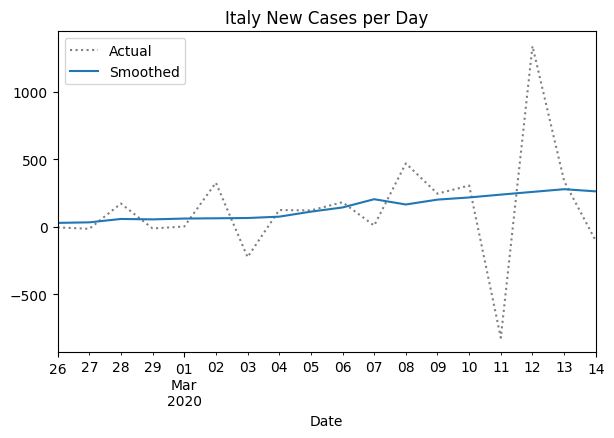

In [39]:
original_italy, smoothed_italy = prepare_cases(df_italy)
plot_cases_for_location(original_italy, smoothed_italy, "Italy")

In [99]:
sigma_italy = find_optimal_sigma_for_df_cases(df_italy)
sigma_italy

1.0

In [100]:
posteriors_italy, log_likelihood_italy = get_posteriors(smoothed_italy, sigma=sigma_italy)

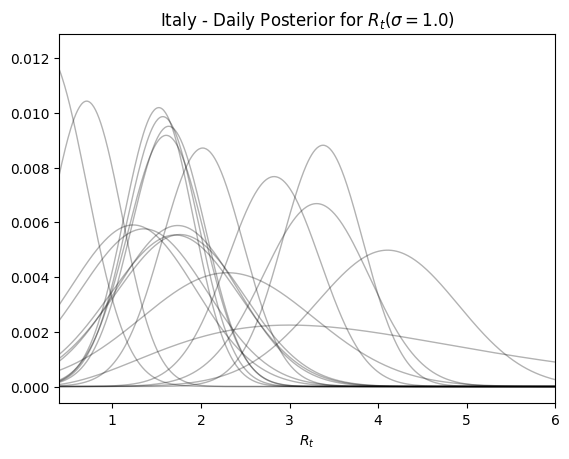

In [108]:
plot_posteriors_to_location_and_sigma(posteriors_italy, "Italy", sigma=sigma_italy)

In [104]:
hdis_italy = highest_density_interval(posteriors_italy, p=.9)
most_likely_italy = posteriors_italy.idxmax().rename('ML')
result_italy = pd.concat([most_likely_italy, hdis_italy], axis=1)
result_italy.tail()

,ML,Low_90,High_90
Date,,,
2020-03-10,1.61,0.87,2.30
2020-03-11,1.64,0.93,2.31
2020-03-12,1.57,0.84,2.18
2020-03-13,1.52,0.85,2.14
2020-03-14,0.71,0.09,1.28


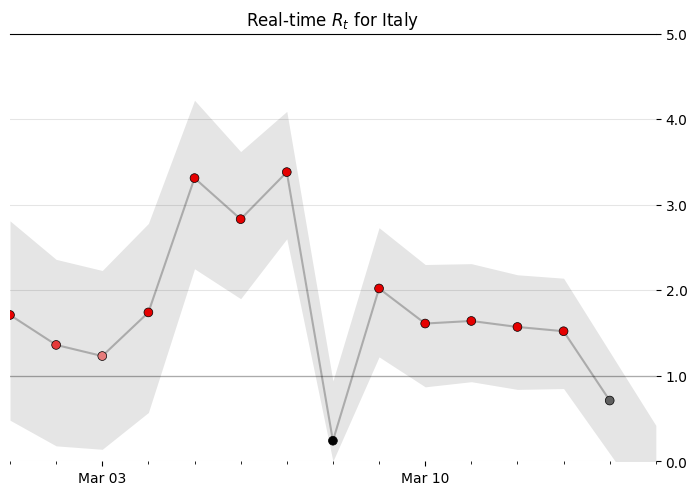

In [148]:
fig, ax = plt.subplots(figsize=(600/72,400/72))

plot_rt(ax, "Italy", result=result_italy)
ax.set_title(f'Real-time $R_t$ for Italy')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

<ipython-input-158-7917cb1c9bc5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_italy_actual_rt = df[df.location == "Italy"][df.date < "2020-03-15"]


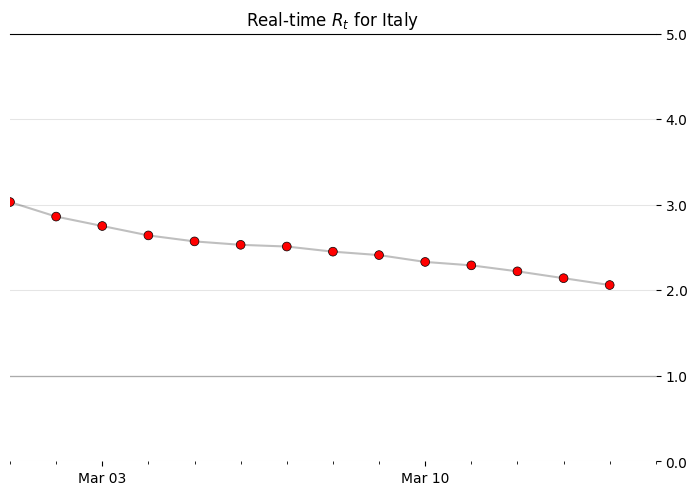

In [158]:
df_italy_actual_rt = df[df.location == "Italy"][df.date < "2020-03-15"]
df_italy_actual_rt = df_italy_actual_rt.set_index('date')['reproduction_rate'].fillna(0)

index = df_italy_actual_rt.index.get_level_values('date')
values = df_italy_actual_rt.values

fig, ax = plt.subplots(figsize=(600/72,400/72))

plot_rt(ax, "Italy", index=index, values=values)
ax.set_title(f'Real-time $R_t$ for Italy')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

## Deutschland pipeline 🇩

In [15]:
df_germany = get_cases_by_location_and_date(df, "Germany", "2020-03-15")
df_germany

Date
2020-01-03       0
2020-01-04       1
2020-01-05       0
2020-01-06       0
2020-01-07       0
              ... 
2020-03-10     348
2020-03-11     595
2020-03-12     758
2020-03-13     990
2020-03-14    1467
Name: Cases, Length: 72, dtype: int64

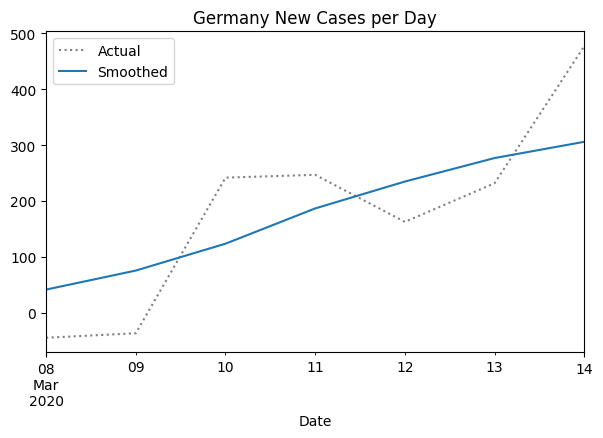

In [40]:
original_germany, smoothed_germany = prepare_cases(df_germany)
plot_cases_for_location(original_germany, smoothed_germany, "Germany")

In [116]:
sigma_germany = find_optimal_sigma_for_df_cases(df_germany)
sigma_germany

0.7999999999999999

In [117]:
posteriors_germany, log_likelihood_germany = get_posteriors(smoothed_germany, sigma=sigma_germany)

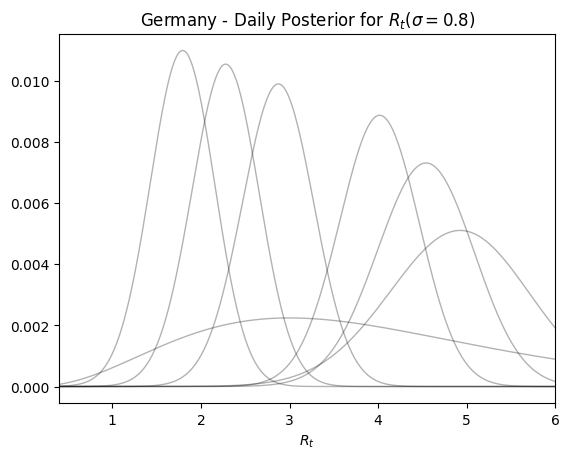

In [121]:
plot_posteriors_to_location_and_sigma(posteriors_germany, "Germany", sigma=sigma_germany)

In [124]:
hdis_germany = highest_density_interval(posteriors_germany, p=.9)
most_likely_germany = posteriors_germany.idxmax().rename('ML')
result_germany = pd.concat([most_likely_germany, hdis_germany], axis=1)
result_germany.tail()

,ML,Low_90,High_90
Date,,,
2020-03-10,4.54,3.58,5.38
2020-03-11,4.02,3.25,4.73
2020-03-12,2.87,2.17,3.50
2020-03-13,2.28,1.61,2.86
2020-03-14,1.79,1.15,2.35


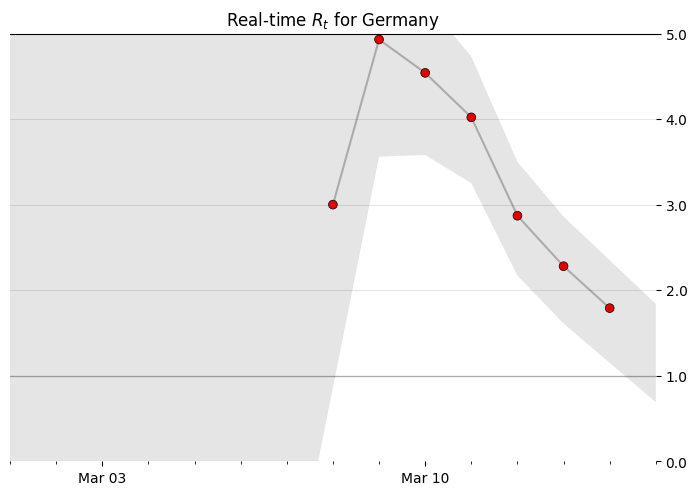

In [159]:
fig, ax = plt.subplots(figsize=(600/72,400/72))

plot_rt(ax, "Germany", result=result_germany)
ax.set_title(f'Real-time $R_t$ for Germany')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

<ipython-input-160-d79b949bf403>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_germany_actual_rt = df[df.location == "Germany"][df.date < "2020-03-15"]


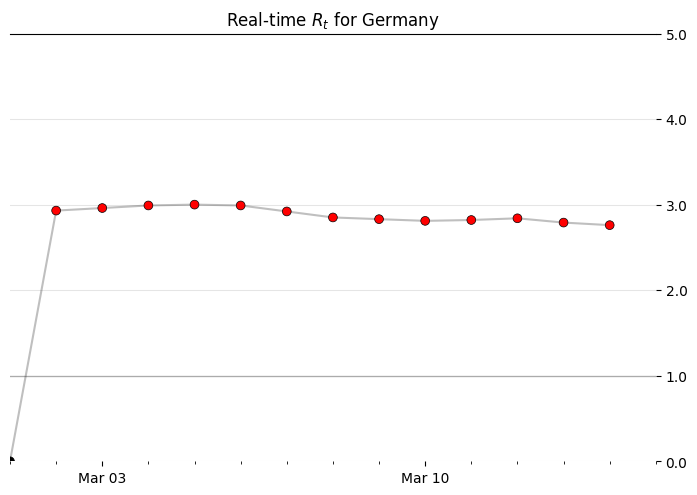

In [160]:
df_germany_actual_rt = df[df.location == "Germany"][df.date < "2020-03-15"]
df_germany_actual_rt = df_germany_actual_rt.set_index('date')['reproduction_rate'].fillna(0)

index = df_germany_actual_rt.index.get_level_values('date')
values = df_germany_actual_rt.values

fig, ax = plt.subplots(figsize=(600/72,400/72))

plot_rt(ax, "Germany", index=index, values=values)
ax.set_title(f'Real-time $R_t$ for Germany')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Второе задание

*Оценить $R_0$ для SARS-Cov-2 по данным заболеваемости в провинции Ухань Китай (использовать данные до 12.02.2020),<br> в Италии и Германии (использовать данные до 15.03.2020) методом Park et. al. 2019*


## China 🇨

In [19]:
df_china = df[df.location == 'China'][df.date < "2020-02-12"]
df_china_K = df_china.set_index('date')['stringency_index']
df_china_K.replace(to_replace=0, value=1, inplace=True)
df_china_K = 1 / df_china_K

df_china_K

<ipython-input-19-1e3ee11fc00b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_china = df[df.location == 'China'][df.date < "2020-02-12"]


date
2020-01-03    1.000000
2020-01-04    1.000000
2020-01-05    0.359712
2020-01-06    0.359712
2020-01-07    0.359712
2020-01-08    0.359712
2020-01-09    0.359712
2020-01-10    0.359712
2020-01-11    0.359712
2020-01-12    0.359712
2020-01-13    0.359712
2020-01-14    0.359712
2020-01-15    0.120048
2020-01-16    0.120048
2020-01-17    0.120048
2020-01-18    0.120048
2020-01-19    0.120048
2020-01-20    0.120048
2020-01-21    0.120048
2020-01-22    0.037893
2020-01-23    0.022267
2020-01-24    0.022267
2020-01-25    0.020969
2020-01-26    0.014304
2020-01-27    0.014304
2020-01-28    0.014304
2020-01-29    0.014304
2020-01-30    0.014304
2020-01-31    0.014304
2020-02-01    0.012935
2020-02-02    0.012935
2020-02-03    0.012935
2020-02-04    0.012935
2020-02-05    0.012935
2020-02-06    0.012935
2020-02-07    0.012935
2020-02-08    0.012935
2020-02-09    0.012935
2020-02-10    0.013252
2020-02-11    0.013252
Name: stringency_index, dtype: float64

In [188]:
integrate.simpson(df_china_K.to_numpy())

6.262970994135436

In [189]:
integrate.simpson(df_china_K.to_numpy()) / df_china_K.size

0.1565742748533859

### Less naive method

In [1]:
shape = 2.6
rate = 0.4

G = shape / rate
k = shape / rate ** 2

In [29]:
def get_linear_coeffs(cases):
    p = np.polyfit(np.arange(len(cases)), np.log(cases), deg=1)
    return p[0], p[1]

In [17]:
def get_r0(a):
    return (1 + k * a * G) ** (1 / k)

In [21]:
df_china_cases = df_china.set_index('date')['new_cases']

In [32]:
c1, c2 = get_linear_coeffs(df_china_cases + 1)

In [35]:
get_r0(c1)

1.231867129377687

## Italy 🇮

In [183]:
df_italy = df[df.location == 'Italy'][df.date < "2020-03-15"]
df_italy_K = df_italy.set_index('date')['stringency_index']
df_italy_K.replace(to_replace=0, value=1, inplace=True)
df_italy_K = 1 / df_italy_K

df_italy_K

<ipython-input-183-b06433cf3863>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_italy = df[df.location == 'Italy'][df.date < "2020-03-15"]


date
2020-01-03    1.000000
2020-01-04    1.000000
2020-01-05    1.000000
2020-01-06    1.000000
2020-01-07    1.000000
                ...   
2020-03-10    0.012558
2020-03-11    0.012134
2020-03-12    0.012134
2020-03-13    0.012134
2020-03-14    0.012134
Name: stringency_index, Length: 72, dtype: float64

In [185]:
integrate.simpson(df_italy_K.to_numpy())

23.570067624035314

In [190]:
integrate.simpson(df_italy_K.to_numpy()) / df_italy_K.size

0.3273620503338238

### Less naive method

In [41]:
c1_italy, c2_italy = get_linear_coeffs(smoothed_italy + 1)
get_r0(c1_italy)

1.1826127456517308

## Deutschland 🇩

In [184]:
df_germany = df[df.location == 'Germany'][df.date < "2020-03-15"]
df_germany_K = df_germany.set_index('date')['stringency_index']
df_germany_K.replace(to_replace=0, value=1, inplace=True)
df_germany_K = 1 / df_germany_K

df_germany_K

<ipython-input-184-920eabd2e6c8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_germany = df[df.location == 'Germany'][df.date < "2020-03-15"]


date
2020-01-03    1.000000
2020-01-04    1.000000
2020-01-05    1.000000
2020-01-06    1.000000
2020-01-07    1.000000
                ...   
2020-03-10    0.030423
2020-03-11    0.030423
2020-03-12    0.030423
2020-03-13    0.030423
2020-03-14    0.030423
Name: stringency_index, Length: 72, dtype: float64

In [186]:
integrate.simpson(df_germany_K.to_numpy())

25.880554690262848

In [191]:
integrate.simpson(df_germany_K.to_numpy()) / df_germany_K.size

0.35945214847587287

Придумать что-то лучше для оценки $S_0$ не получилось, реализовать IS (importance sampling) Монте-Карло в целом возможно но как его применить и на что не понятно. Решил поэтому отталкиваясь от базового определения $R_0 = ∫K(τ)dτ$ в качестве "контактов" использовать обратный коэффициент строгости карантинных мер. В результате оценка грубая и очень завышенная. Нормировочный коэфициент подгонять думаю не вариант.

### Less naive method

In [42]:
c1_germany, c2_germany = get_linear_coeffs(smoothed_germany + 1)
get_r0(c1_germany)

1.245286336071966